# Step 1: Imports the libraries

In [47]:
# Core data packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Modeling and preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

# Evaluation metrics
from sklearn.metrics import (
    classification_report, confusion_matrix, ConfusionMatrixDisplay,
    roc_auc_score, roc_curve, precision_recall_curve, accuracy_score, 
    f1_score, precision_score, recall_score
)

# Step 2: Data Loading 

## 2.1 : Install the library having the dataset

In [2]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


## 2.2: Fetch the dataset

In [3]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
df = fetch_ucirepo(id=144) 
df  

{'data': {'ids': None,
  'features':     Attribute1  Attribute2 Attribute3 Attribute4  Attribute5 Attribute6  \
  0          A11           6        A34        A43        1169        A65   
  1          A12          48        A32        A43        5951        A61   
  2          A14          12        A34        A46        2096        A61   
  3          A11          42        A32        A42        7882        A61   
  4          A11          24        A33        A40        4870        A61   
  ..         ...         ...        ...        ...         ...        ...   
  995        A14          12        A32        A42        1736        A61   
  996        A11          30        A32        A41        3857        A61   
  997        A14          12        A32        A43         804        A61   
  998        A11          45        A32        A43        1845        A61   
  999        A12          45        A34        A41        4576        A62   
  
      Attribute7  Attribute8 Attribute

## 2.3: Check the features and target

In [4]:
X = df.data.features 
y = df.data.targets 

In [5]:
X.head()

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,Attribute11,Attribute12,Attribute13,Attribute14,Attribute15,Attribute16,Attribute17,Attribute18,Attribute19,Attribute20
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201


### The dataset contains 1,000 samples, each with 20 features and a binary target ("class"). 
### Initially we have 'class' as 1=Good, 2=Bad, we will map 0=Bad and 1=Good for clarity in modeling.

In [6]:
y['class'] = y['class'].map({1: 1, 2: 0})

/tmp/ipykernel_36/2437361946.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['class'] = y['class'].map({1: 1, 2: 0})


In [7]:
y

,class
0,1
1,0
2,1
3,1
4,0
...,...
995,1
996,1
997,1
998,0


# Step 3: Exploratory Data Analysis (EDA)

## 3.1: Target Variable Distribution

In [8]:
class_counts = y['class'].value_counts(normalize=True)
print("Fraction of Good credit (1): {:.2%}".format(class_counts[1]))
print("Fraction of Bad credit (0): {:.2%}".format(class_counts[0]))

Fraction of Good credit (1): 70.00%
Fraction of Bad credit (0): 30.00%


### We can see there are more "Good" cases than "Bad".

## 3.2: Numerical Features Summary


In [9]:
numerical_cols = [
    'Attribute2', 'Attribute5', 'Attribute8', 'Attribute11', 
    'Attribute13', 'Attribute16', 'Attribute18'
]

X[numerical_cols].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Attribute2,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0
Attribute5,1000.0,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
Attribute8,1000.0,2.973,1.118715,1.0,2.0,3.0,4.00,4.0
Attribute11,1000.0,2.845,1.103718,1.0,2.0,3.0,4.00,4.0
Attribute13,1000.0,35.546,11.375469,19.0,27.0,33.0,42.00,75.0
Attribute16,1000.0,1.407,0.577654,1.0,1.0,1.0,2.00,4.0
Attribute18,1000.0,1.155,0.362086,1.0,1.0,1.0,1.00,2.0


## 3.3: Visualizing Distributions

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


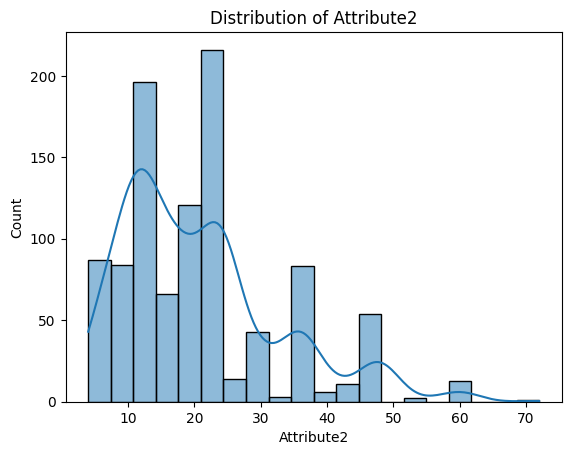

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


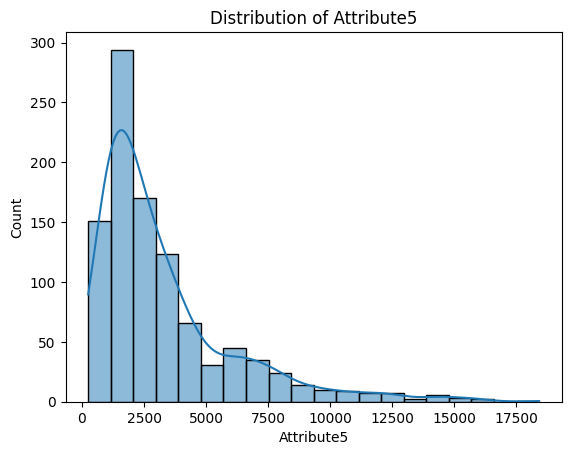

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


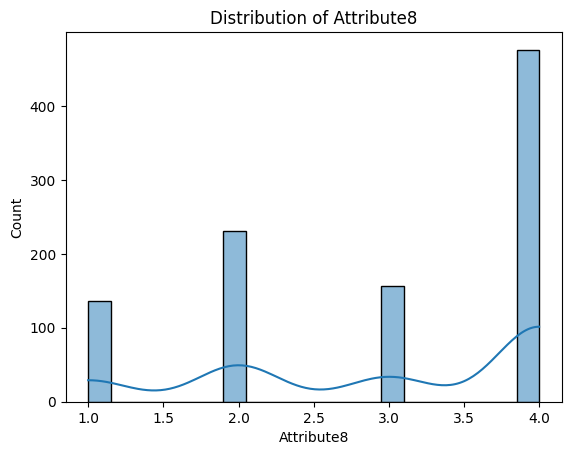

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


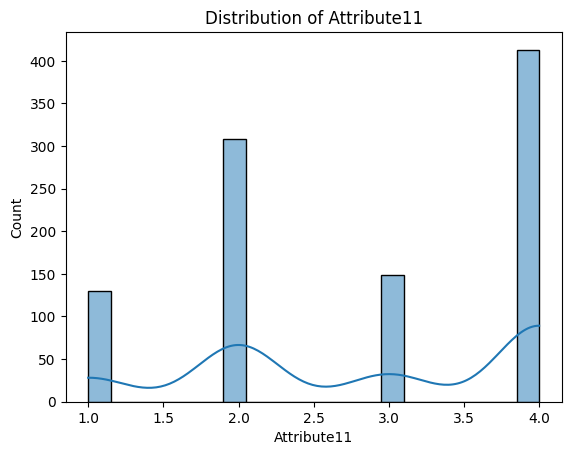

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


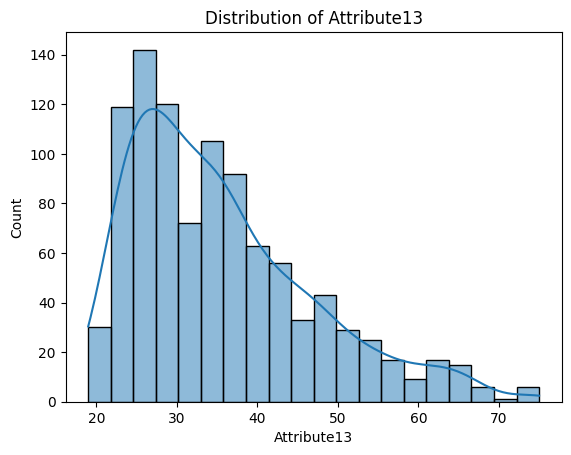

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


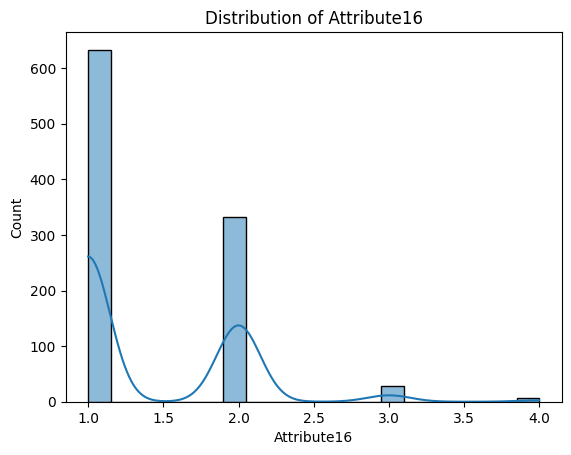

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


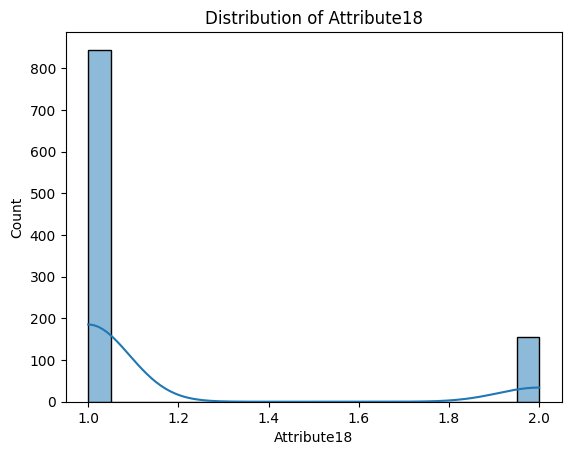

In [10]:
for col in numerical_cols:
    sns.histplot(X[col], kde=True, bins=20)
    plt.title(f'Distribution of {col}')
    plt.show()

### We can see Attribite 5 (Credit Amount) and Attribute 13(Age) are right-skewed.

## 3.4: Relationship Between Features and Target

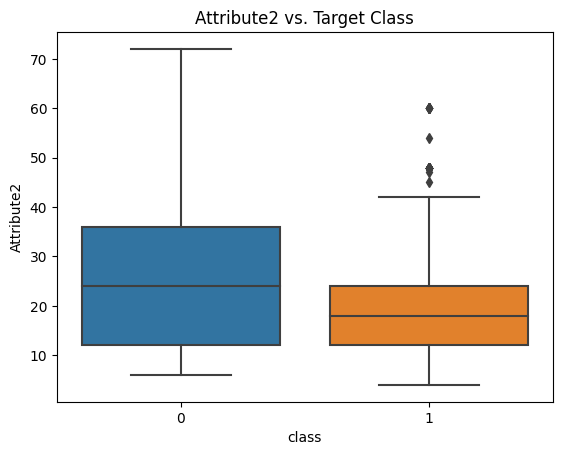

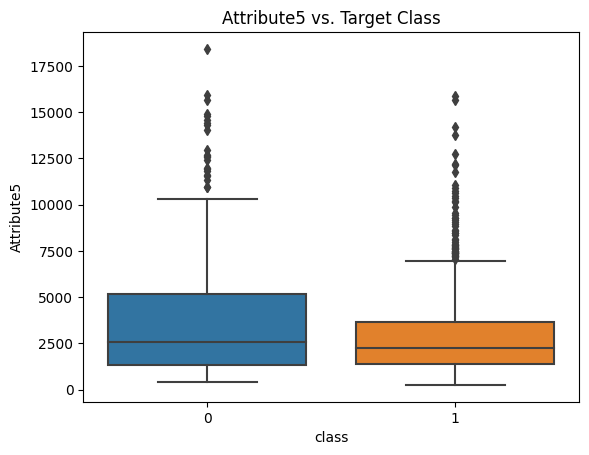

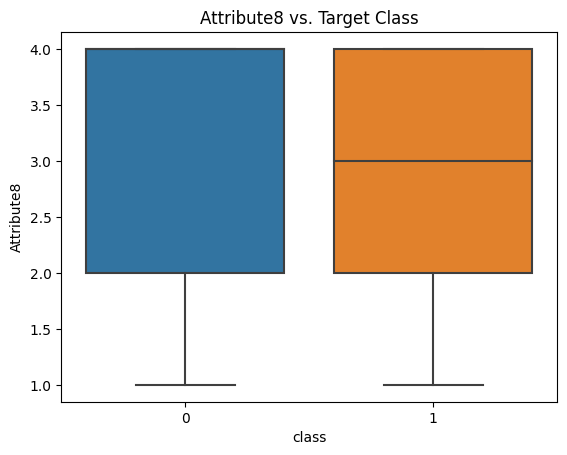

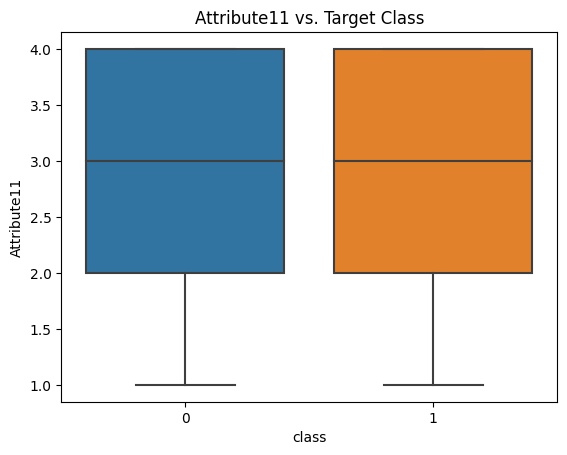

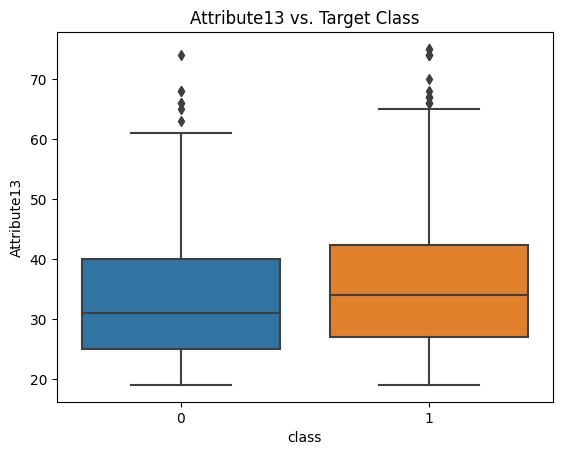

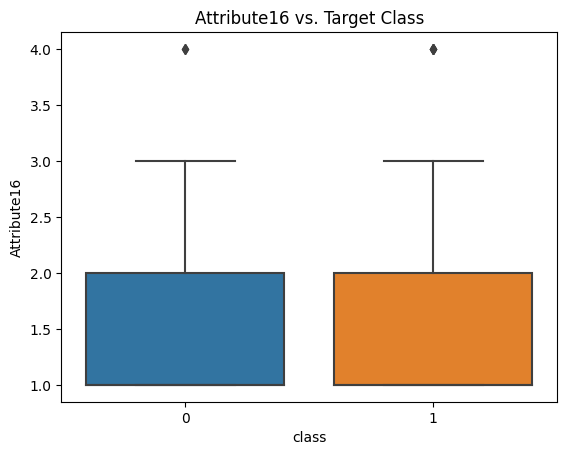

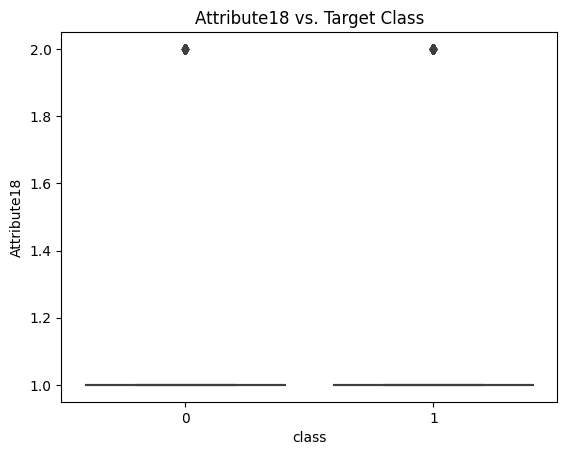

In [11]:
for col in numerical_cols:
    sns.boxplot(x=y['class'], y=X[col])
    plt.title(f'{col} vs. Target Class')
    plt.show()

### We can see Attribute 2 and 5 are higher for class bad compared to good.

## 3.5: Categorical Features Summary

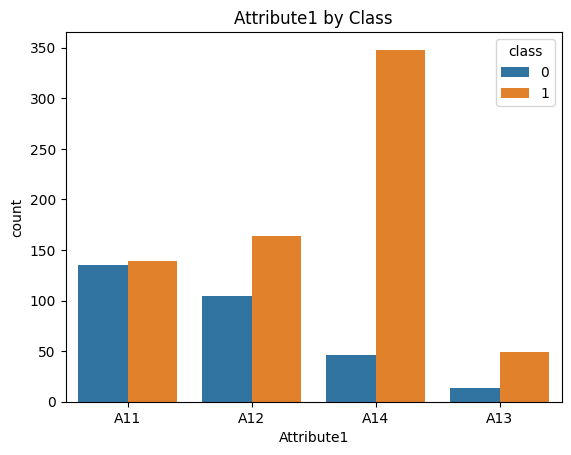

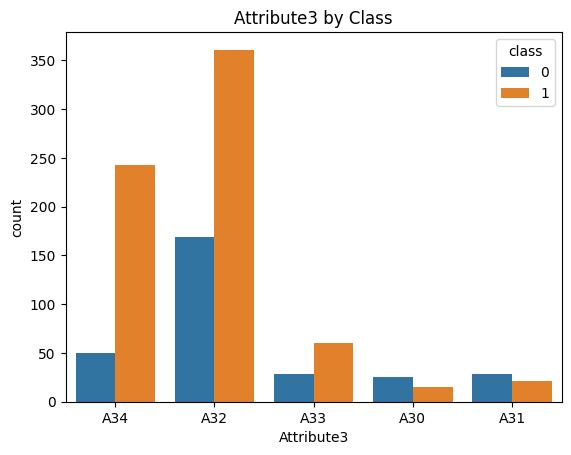

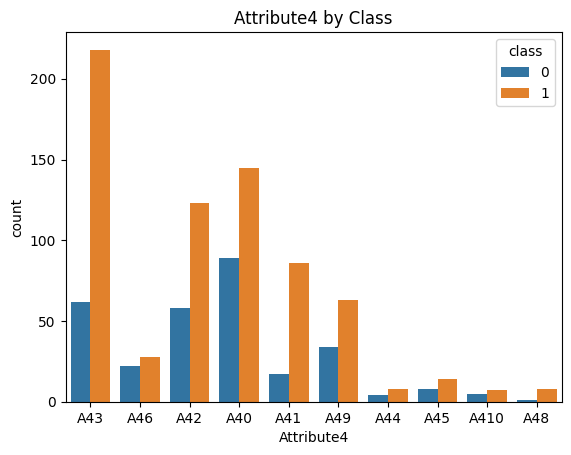

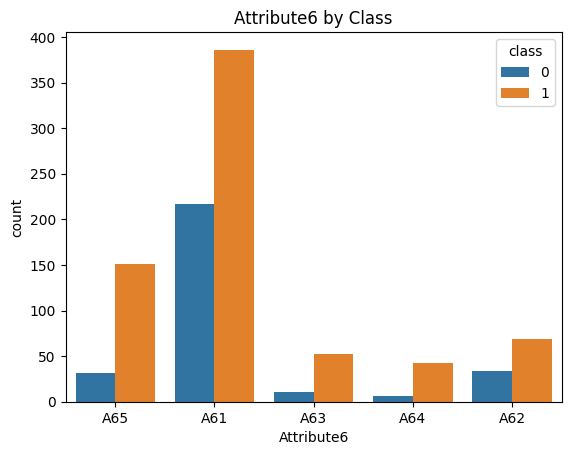

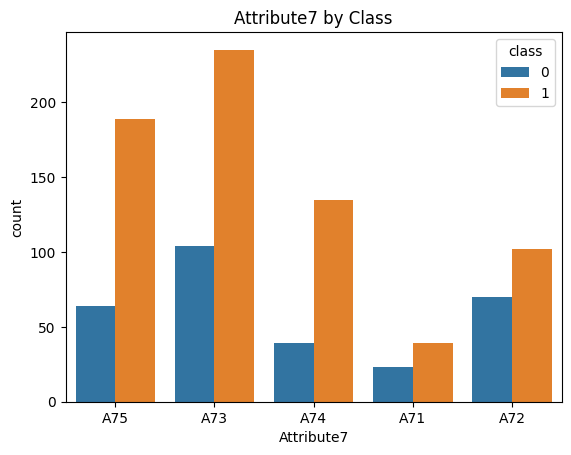

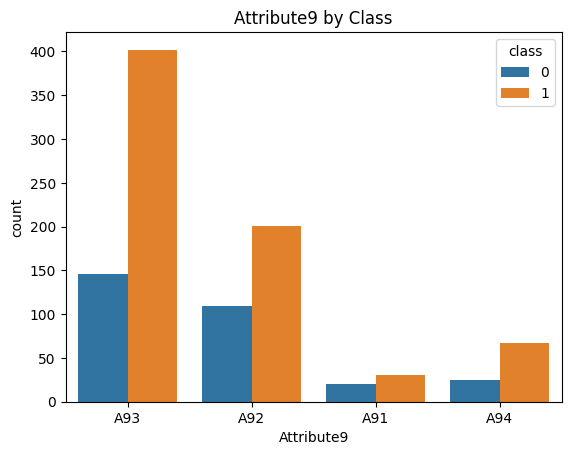

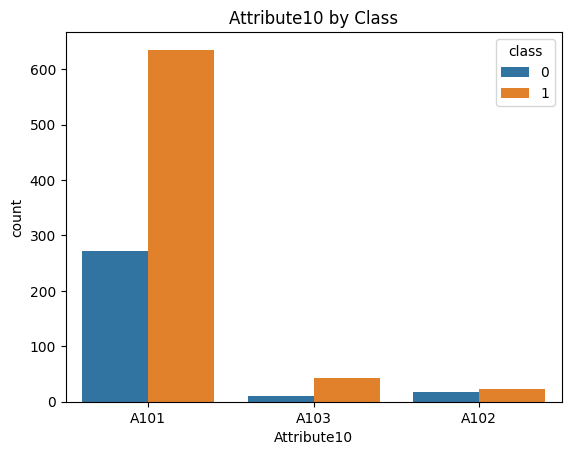

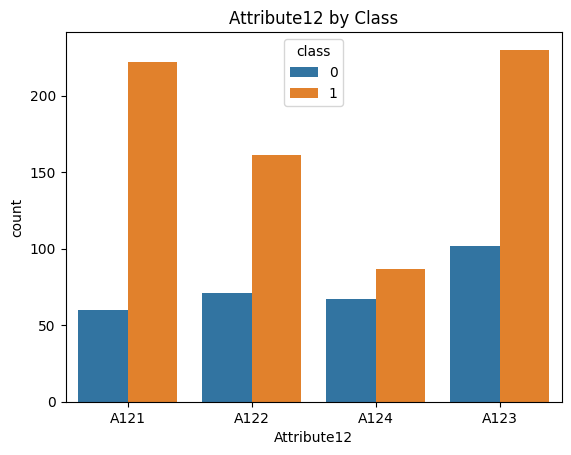

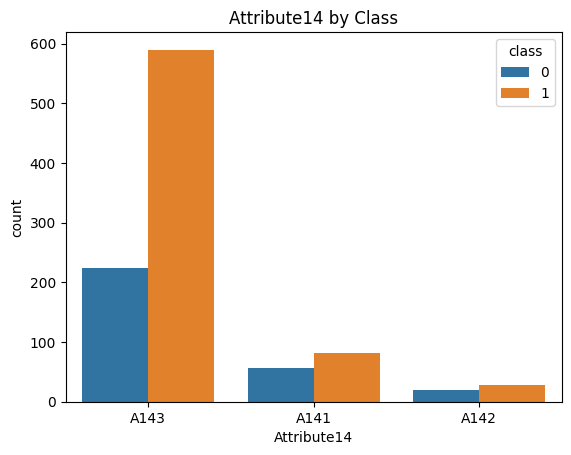

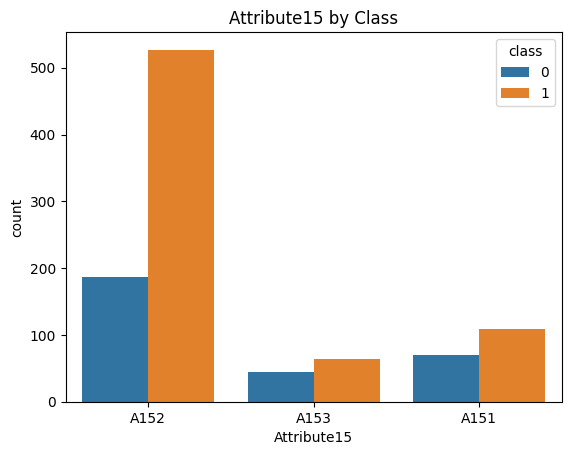

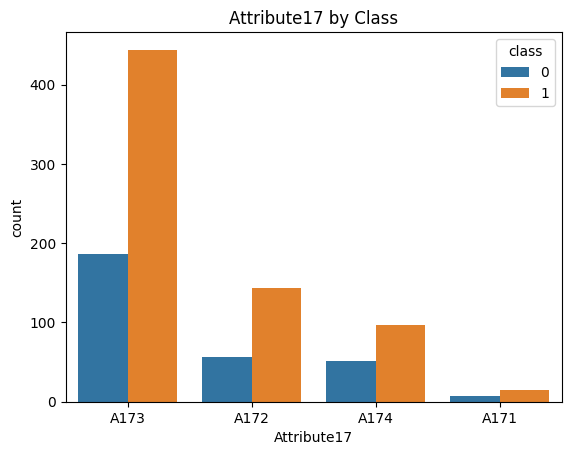

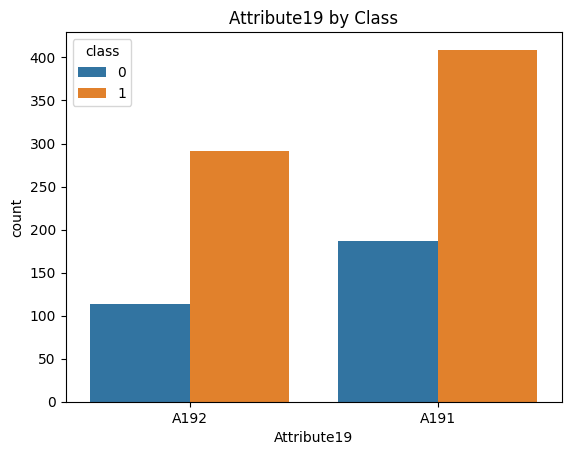

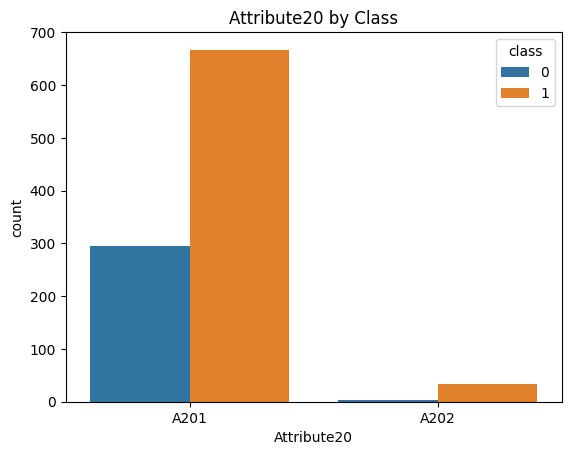

In [12]:
categorical_cols = [
    'Attribute1', 'Attribute3', 'Attribute4', 'Attribute6', 'Attribute7', 
    'Attribute9', 'Attribute10', 'Attribute12', 'Attribute14', 'Attribute15', 
    'Attribute17', 'Attribute19', 'Attribute20'
]

for col in categorical_cols:
    sns.countplot(x=col, hue=y['class'], data=X)
    plt.title(f'{col} by Class')
    plt.show()


## 3.6: Correlation Analysis

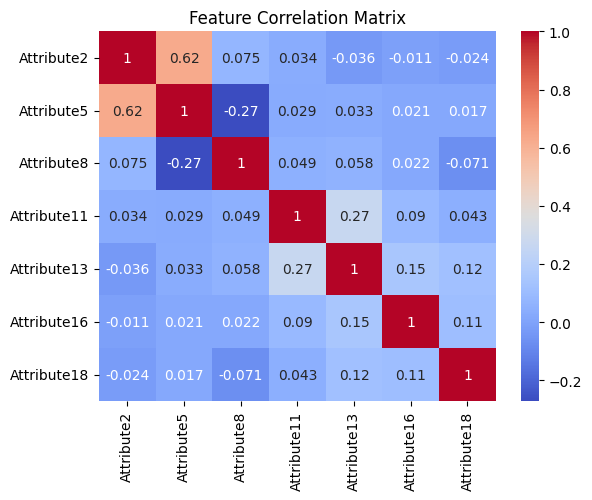

In [24]:
corr = X[numerical_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

# Step 4: Preprocessing and Data Splitting

In [26]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y.values.ravel(), stratify=y, test_size=0.2, random_state=42
)

# Step 5: Pipeline Setup

In [27]:
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols)
])

# Step 6: Random Forest Model Initialisation

In [28]:
rf = RandomForestClassifier(class_weight='balanced', random_state=42)
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('clf', rf)
])

# Step 7: Hyperparameter Tuning

In [29]:
param_grid = {
    'clf__n_estimators': [100, 200],
    'clf__max_depth': [8, 12, 20, None],
    'clf__min_samples_split': [2, 5],
    'clf__max_features': ['sqrt', 'log2', None],
}
grid = GridSearchCV(pipeline, param_grid, cv=10, scoring='f1', n_jobs=-1, verbose=1)
grid.fit(X_train, y_train)

print("\nBest Params:")
print(grid.best_params_)

Fitting 10 folds for each of 48 candidates, totalling 480 fits

Best Params:
{'clf__max_depth': None, 'clf__max_features': 'sqrt', 'clf__min_samples_split': 2, 'clf__n_estimators': 200}


# Step 8: Model Evaluation

In [31]:
y_proba = grid.predict_proba(X_test)[:,1]
y_pred = (y_proba >= 0.5).astype(int)

## 8.1: Standard Metrics

In [32]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))

Accuracy: 0.72
Precision: 0.7692307692307693
Recall: 0.8571428571428571
F1-score: 0.8108108108108107
ROC-AUC: 0.7843452380952382


In [33]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.40      0.46        60
           1       0.77      0.86      0.81       140

    accuracy                           0.72       200
   macro avg       0.66      0.63      0.64       200
weighted avg       0.70      0.72      0.71       200



## 8.2: Confusion Matrix

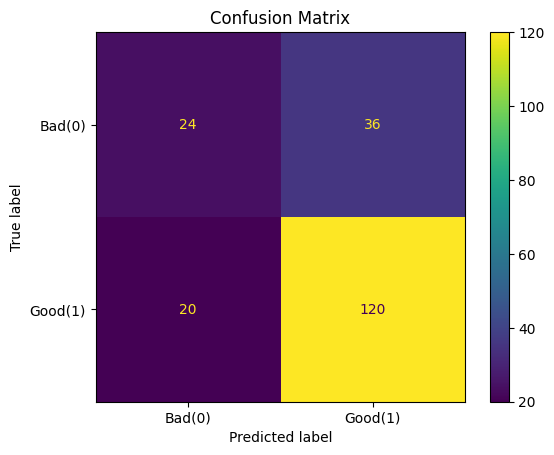

In [34]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=['Bad(0)', 'Good(1)']).plot()
plt.title("Confusion Matrix")
plt.show()

### We can see the model predicts 36 bad customers as good which is bad. We need to minimize this number. 

## 8.3: ROC Curve

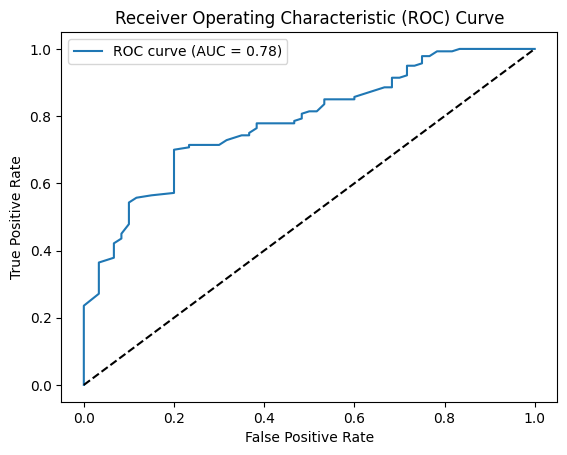

In [35]:
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc_score(y_test, y_proba):.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend()
plt.show()

## 8.4: Precision-Recall Curve

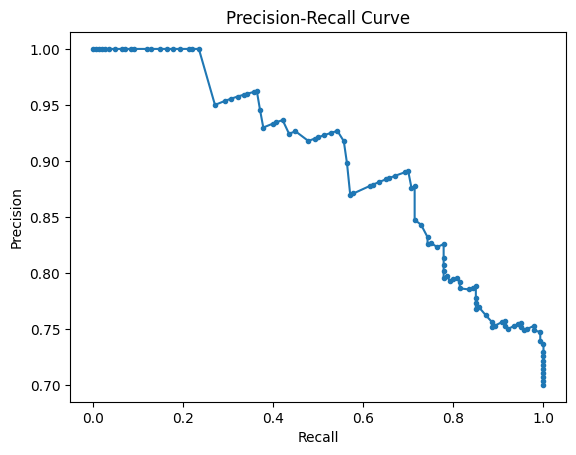

In [36]:
precision, recall, _ = precision_recall_curve(y_test, y_proba)
plt.plot(recall, precision, marker='.')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()

## 8.5: Cost-Sensitive Misclassification (According to Statlog Cost Matrix)

### It is worse to class a customer as good when they are bad (5), than it is to class a customer as bad when they are good (1).

In [38]:
cost = cm[0,1]*5 + cm[1,0]*1
print(f"Total Cost-sensitive Misclassification: {cost}")

Total Cost-sensitive Misclassification: 200


# Step 9: Threshold Optimization & Cost Minimization

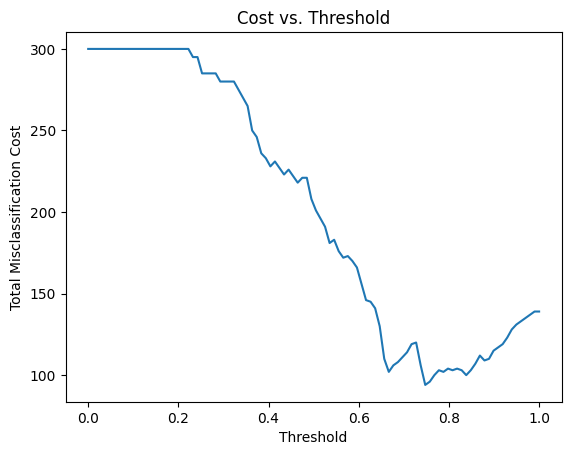

Optimal threshold: 0.747 
Lowest cost: 94


In [44]:
thresholds = np.linspace(0, 1, 100)
costs = []
for t in thresholds:
    y_thr = (y_proba >= t).astype(int)
    cm_thr = confusion_matrix(y_test, y_thr)
    cost_score = cm_thr[0,1]*5 + cm_thr[1,0]*1
    costs.append(cost_score)

plt.plot(thresholds, costs)
plt.xlabel('Threshold')
plt.ylabel('Total Misclassification Cost')
plt.title('Cost vs. Threshold')
plt.show()

best_threshold = thresholds[np.argmin(costs)]
print(f'Optimal threshold: {best_t:.3f} \nLowest cost: {min(costs)}')

## 9.1: Model Evaluation based on Optimal Threshold


Classification Report (Optimized Threshold):
              precision    recall  f1-score   support

           0       0.46      0.90      0.61        60
           1       0.93      0.54      0.68       140

    accuracy                           0.65       200
   macro avg       0.69      0.72      0.65       200
weighted avg       0.79      0.65      0.66       200



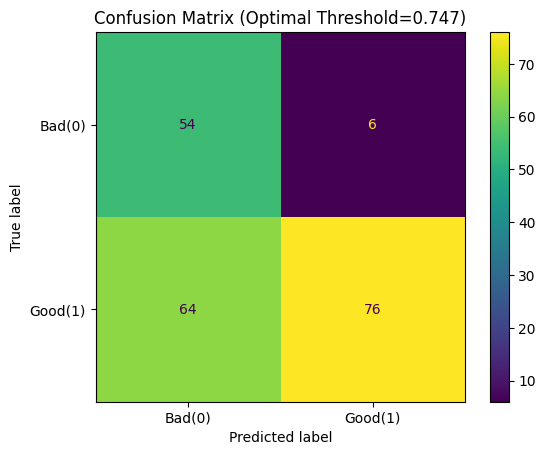

In [45]:
y_pred_best = (y_proba >= best_threshold).astype(int)
print("\nClassification Report (Optimized Threshold):")
print(classification_report(y_test, y_pred_best))

cm_best = confusion_matrix(y_test, y_pred_best)
ConfusionMatrixDisplay(cm_best, display_labels=['Bad(0)', 'Good(1)']).plot()
plt.title(f"Confusion Matrix (Optimal Threshold={best_threshold:.3f})")
plt.show()

## Thus the model only predicts 6 bad customers as good which lowers the risk and also the cost of misclassification.